In [2]:
from google.colab import files
uploadtrain =  files.upload()

Saving label_training.txt to label_training.txt
Saving training.txt to training.txt


In [4]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv(io.BytesIO(uploadtrain['training.txt']), sep = '\s+', header = None)
df.columns = ['Info_id', 'feature_id', 'value']
df.head()

,Info_id,feature_id,value
0,1,6,1.0
1,1,160,31.0
2,1,438,1.0
3,1,479,1.0
4,1,618,1.0


In [6]:
df1 = pd.read_csv(io.BytesIO(uploadtrain['label_training.txt']), header = None)
df1.columns = ['labels']
df1.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [7]:
mat = pd.pivot_table(df, index = 'Info_id', columns = 'feature_id', values = 'value')
mat = mat.fillna(0)
mat.head()

feature_id,2,3,4,5,6,8,10,12,15,21,22,23,25,26,27,28,29,31,33,36,38,39,41,42,44,51,52,53,56,63,64,65,66,72,76,78,80,83,85,89,...,26299,26300,26302,26304,26305,26308,26309,26310,26312,26313,26315,26316,26318,26319,26320,26321,26322,26326,26327,26332,26334,26335,26336,26337,26338,26339,26340,26344,26348,26349,26350,26351,26352,26354,26355,26356,26357,26360,26362,26364
Info_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.decomposition import PCA
#mat1 = train.drop(['labels'], axis=1)
pca = PCA(n_components=100)
fit = pca.fit_transform(mat)
mat_df = pd.DataFrame(data = fit)

In [9]:
mat1 = pd.merge(mat_df, df1, left_index = True, right_index=True)
mat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,labels
0,-34.286615,-12.721954,66.547243,38.600362,44.198061,-16.080071,30.154205,-7.114675,-25.047078,8.155958,36.013310,25.962917,32.911562,-5.543206,-0.758582,-6.420062,19.325942,5.741185,-45.049201,43.364403,-40.683237,-8.138507,9.140811,-24.692235,18.336739,68.765499,-7.986162,-23.684914,-39.059662,16.464650,0.919202,31.852778,-22.103665,-7.417009,20.573721,-4.419120,-3.562485,-36.411188,-60.857750,0.879319,...,-1.196189,0.128982,1.395373,-1.012214,-0.160126,-0.836565,0.123452,-0.178837,-0.713565,0.551821,-0.585226,0.851374,0.888904,-1.896116,0.242972,-0.101564,0.913738,0.492712,-1.078618,-0.060840,-0.380907,0.775192,1.161339,0.027776,-0.310742,-0.685170,-0.724981,-0.324797,1.250601,1.710882,-0.700686,0.111396,0.080722,-0.541248,-0.150084,-1.750387,-0.035475,0.263325,-0.103085,1
1,23.901116,-22.975198,-68.809828,-2.183722,14.823012,-38.260772,-32.259866,31.603368,28.485574,-17.838115,2.508111,-41.097644,23.641177,-16.739122,3.646941,53.515177,37.923851,-16.156619,0.789810,7.245697,9.532312,46.518038,43.819888,-57.830605,-4.061133,9.484703,-28.908007,23.975313,16.616407,24.173809,-37.510419,35.415749,-21.983527,-18.591174,30.861683,8.625289,0.040626,8.102063,18.702834,-8.226593,...,0.447878,-0.279374,0.860252,-0.438200,-0.099711,1.542277,2.508878,-0.808168,-1.648960,-0.459271,-0.169091,1.159383,-0.558032,-0.068937,0.014501,0.145079,0.344702,-0.225847,-0.118411,-0.467044,-0.711308,-0.377860,0.060305,0.601766,-0.807959,-0.376466,-0.447034,0.823670,-0.361579,-0.120387,0.657290,-1.147486,0.971164,0.301288,-1.650096,-1.398445,-1.759637,0.834122,-2.567441,1
2,16.071592,-32.588397,37.704559,53.023685,21.358713,-24.571468,-49.949174,-23.518261,-47.424870,-16.332495,83.105093,19.084792,-32.114304,-23.101705,1.052174,55.688575,-19.891466,-24.519777,-39.875351,29.746537,20.978377,-31.901999,-16.203814,-43.617110,39.286925,6.229675,-31.570592,5.353984,23.498689,14.432442,17.969991,29.306188,-37.988258,-4.284061,5.852345,-11.093709,1.273203,-12.002374,11.905219,19.342088,...,-0.080161,-0.550612,-1.886825,-0.601648,0.387656,1.932970,-0.484364,-0.073049,0.742093,-0.538549,0.496602,-1.316117,-0.205081,1.238987,0.195071,0.351083,-0.082708,-0.374743,0.680076,0.424444,0.724023,-0.609757,-1.001063,0.864828,0.121322,0.101232,-0.859692,0.174340,-0.371975,-0.255644,-0.482440,-0.634890,0.594797,-0.099176,-0.077483,-0.010232,1.516545,0.308070,0.314792,1
3,7.736907,-25.975390,37.202887,-7.463795,24.550725,-20.133819,-2.003962,5.738670,16.987992,24.182175,-0.843551,5.424937,-56.353170,-7.178428,-23.243953,30.951218,3.137014,36.122407,-36.815911,5.033386,27.972731,-15.622470,-33.549515,-16.778337,4.996819,-17.291664,-27.395690,-14.564795,-5.320009,31.466921,0.481222,7.142111,-8.102668,-26.653859,-26.479365,-2.165070,23.334173,-3.876824,1.740165,52.353137,...,-0.174741,-0.398825,-0.701739,1.223563,-0.292984,-0.453354,0.265454,-1.385676,1.347773,1.774402,-0.099960,0.399200,-0.122229,0.373420,0.113337,0.246193,0.497287,-1.173059,0.652827,0.595539,0.124426,0.728938,0.334908,-1.214202,-1.167138,0.027990,-1.044198,0.174080,-0.123494,0.302685,-0.113048,0.572742,0.421238,0.188324,-0.359839,-0.262963,-0.077604,-0.333422,0.863438,1
4,3.076045,-5.450483,-4.501322,-83.236003,-78.201476,-18.274651,-14.541837,26.240233,-2.269347,74.312457,25.970956,-4.632598,-6.532892,11.798272,34.648578,3.159208,17.775208,16.345217,-23.871294,-40.560748,-58.703020,21.061998,-33.578670,-1.802381,-24.204241,41.213498,21.116942,-43.481985,11.060396,2.628134,61.436101,39.089203,-2.715558,-24.492062,-14.058377,-41.607084,7.493554,22.782246,-29.662276,-11.818569,...,0.432088,-0.640117,-0.753401,-0.177162,-1.272040,1.197536,0.057260,1.002755,0.164108,-0.020863,-0.308172,-0.263384,-0.360320,-0.112581,-0.587989,-0.030423,0.595297,-0.486354,0.618051,0.867722,0.0

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mat1, test_size=0.2)

In [11]:
X = train.drop(['labels'], axis=1)
X.values

array([[ 3.42557453e+00, -1.43415307e+01, -2.22709492e+01, ...,
         4.25420221e-03,  4.13645138e-02,  2.30618896e-01],
       [ 4.65330985e-01, -3.49977616e+01, -4.84840164e+01, ...,
         6.80087680e-01, -1.34549882e-01, -4.33390635e-01],
       [-4.17722126e+01, -2.18774391e+01, -3.18304517e+00, ...,
        -3.21574046e-01,  1.35271768e-01, -4.52770635e-01],
       ...,
       [ 1.00196863e+01,  3.76018921e+00, -2.91278687e+00, ...,
         6.31331028e-01,  9.73431188e-01, -7.79431719e-01],
       [ 1.50827388e+01,  2.46737779e+01,  4.17564893e+01, ...,
        -3.37241354e-01,  1.43180335e-01,  2.18883325e-01],
       [ 1.97363231e+01,  2.22434193e+01,  1.40193798e+01, ...,
        -9.81319557e-01, -3.29567870e-01, -4.39702480e-01]])

In [12]:
Y=train['labels']
Y.head()

547     1
920     1
458     1
1780    1
1800   -1
Name: labels, dtype: int64

In [13]:
X1 = test.drop(['labels'], axis=1)
X1.values

array([[ 1.21663704e+01, -2.70919028e+01, -2.72583868e+01, ...,
        -1.82121835e+00, -4.94439553e-01,  1.33193683e+00],
       [-1.09285435e+01,  6.73181926e+01,  4.35376427e+01, ...,
         7.57947556e-01, -1.37156713e-01, -7.01173017e-01],
       [ 1.33654220e+01, -5.26648897e+01,  2.54607629e+00, ...,
        -2.41822287e-02,  2.96399103e-01,  3.04288519e-01],
       ...,
       [-1.44677591e+01, -4.80045197e+00,  5.23459060e+01, ...,
        -9.53102415e-02, -8.56045840e-02, -3.09272883e-01],
       [ 1.54896409e+01, -2.57421492e+01,  5.26504406e+01, ...,
        -1.25389690e-01, -3.94708672e-02,  1.84605583e-01],
       [-3.97401779e+01,  3.99574860e+01,  2.36777328e+00, ...,
        -4.45756248e-01,  1.44981601e+00,  4.80390063e-01]])

In [14]:
Y1 = test['labels']
Y1

503    -1
481    -1
1120   -1
1062   -1
336    -1
       ..
185     1
1581   -1
1683    1
1643    1
991    -1
Name: labels, Length: 369, dtype: int64

In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
predY = clf.predict(X1)
predY

array([-1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [0]:
predictions = pd.concat([pd.Series(Y1.values,name='Actual Class'),pd.Series(predY,name='Predicted Class')], axis=1)

In [18]:
predictions.tail()

,Actual Class,Predicted Class
364,1,1
365,-1,-1
366,1,1
367,1,1
368,-1,-1


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions['Actual Class'], predictions['Predicted Class'])

0.7669376693766937

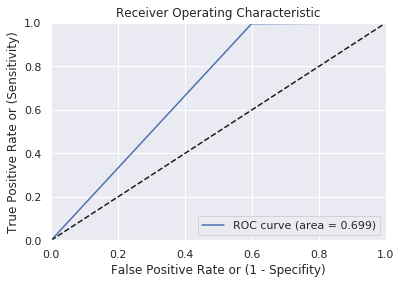

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr,tpr, thresholds = roc_curve(predictions['Actual Class'].values, predictions['Predicted Class'].values)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

0.9434757242554888

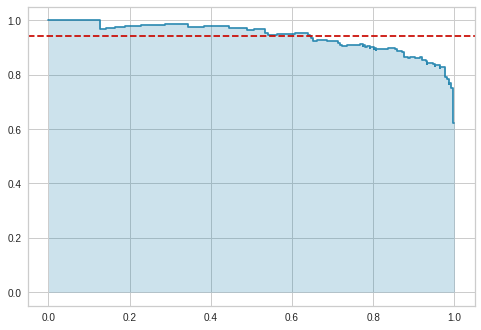

In [23]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
viz = PrecisionRecallCurve(clf)
viz.fit(X, Y)
viz.score(X1,Y1)

0.7669376693766937

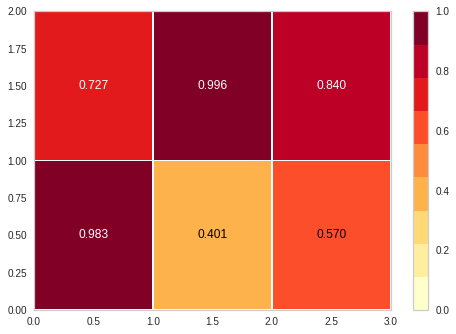

In [24]:
viz = ClassificationReport(clf)
viz.fit(X, Y)
viz.score(X1,Y1)